####  COMP41680 - Assignment 2
#### Student Name: Sarah McCartan
#### Student No: 15206644


### Task 1. Identify a suitable online web API as your source of data.

API identified : TMDB API, this API generates movie data from IMDB and another API OMDB

A wrapper for python exists - tmdbsimple which I downloaded using pip: pip install tmdbsimple


In [1]:
import tmdbsimple as tmdb #import wrapper for the TMDB API
tmdb.API_KEY = "7a93eabab2aa5250c0ca25bc2c5a7ea8"  #API key

###  Task 2. Collect a dataset from the API using Python. Depending on the API, you may need to repeat process this multiple times to collect sufficient data:

I have decided to download data from the top 100 most popular films from the past 6 years 2010-2015

### Task 3. Parse the collected data, and store it in an appropriate file format for subsequent
### analysis (e.g. plain text, JSON, XML, CSV).

I have store the parsed data in a JSON file called json-disc-raw.json

In [226]:
import json

year=[2010, 2011, 2012, 2013, 2014, 2015] #list of years
pg=list(range(1,6)) #page range 1-100 is max range can call from this API
#I want 100 most popular per year and there are 20 results per page
#these will be ordered by popularity per year i.e first page contains top 20 poplular films and so on.

fout = open("1-discover-data.json", "w", encoding = "utf-8") #open new json file to write out to
d_list=[]

for y in year: 
    for p in pg:
        
        search = tmdb.Discover()  #discover allows a search over a parameter like year, 
        response = search.movie(primary_release_year= "%d" %y, page="%d" %p) #get all the movies released in 2015,       
        disc_data = search.results #returns results for each film
        disc_response=json.dumps(disc_data, "utf-8")
        disc_jsondata = json.loads(disc_response)#parse the data
        for item in disc_jsondata:
            d_list.append(item)
              
json.dump(d_list, fout)

fout.close() 


Open and load 1-discover-data.json file

In [1]:
import json  #have added in so library is imported if you dont run the above step 

with open("1-discover-data.json", encoding = "utf-8") as json_file:
    json_data = json.load(json_file)
    

Task 4. Load and represent the data using an appropriate data structure (i.e. items as
rows, described by features as columns).

Data is loaded into a pandas dataframe

In [2]:
import pandas as pd

df_disc_raw=pd.DataFrame(json_data)

df_disc_raw

adult                     backdrop_path                 genre_ids  \
0    False  /s2bT29y0ngXxxu2IA8AOzzXTRhd.jpg   [28, 53, 878, 9648, 12]   
1    False  /8YA36faYlkpfp6aozcGsqq68pZ9.jpg           [12, 14, 10751]   
2    False  /fmLWuAfDPaUa3Vi5nO1YUUyZaX6.jpg            [18, 53, 9648]   
3    False  /5EU3ZEGUSfDzFQpHvjW4vBfGHSy.jpg                      [18]   
4    False  /ma5Ps40txofscTtWpjs39swMnwZ.jpg              [12, 14, 28]   
5    False  /jxdSxqAFrdioKgXwgTs5Qfbazjq.jpg             [12, 28, 878]   
6    False  /rpvDBeVazJyBV5SxtnQWIgL5SIb.jpg           [16, 10751, 35]   
7    False  /AmCtBQc5KxJfJVdS2TkY4Pc9lPd.jpg           [10751, 14, 12]   
8    False  /aD8iOuLlEiMfVlHTnAe15fZLo0S.jpg   [35, 12, 14, 16, 10751]   
9    False  /uFg02Gt69UM6Ouam4slMdD0s029.jpg               [16, 10751]   
10   False  /nMulOcoR6HAahofkcuo4mtA0o9j.jpg       [14, 12, 16, 10751]   
11   False  /x5u73uBylbyCCnkzUGzt3uozqRp.jpg                  [28, 53]   
12   False  /v0o9M1us65w1kDQp8Q6KnB5a11s.jpg      [14, 12, 28, 35, 18]   
13   False  /yo1ef57MEPkEE4BDZKTZGH9uDcX.jpg           [28, 16, 10751]   
14   False  /o6anuGPog9853CPiaPQEMmdBVT0.jpg  [16, 28, 35, 10751, 878]   
15   False  /lKCZYVQQb7Agw6WR25WvQBFKJmK.jpg       [12, 14, 18, 10749]   
16   False  /eS9RYCLWA031K3x9fDEv8WE45Ti.jpg            [18, 9648, 53]   
17   False  /awMESdeGymmNYTMhWvjJE5AP61a.jpg              [28, 35, 80]   
18   False  /r38utnwaWYRkWinxDrRyPviX81E.jpg      [28, 12, 35, 80, 53]   
19   False  /3CbUdwyKnEcLSLkQYWJfi8H6gPO.jpg               [18, 10749]   
20   False  /mwI5fTor198yK4w7LDOfuPssxF2.jpg           [35, 18, 10749]   
21   False  /uHQzRMqhs1bA1fLEP6J1Qc19Nfg.jpg           [12, 14, 10751]   
22   False  /7UfW01brClXNFNNMCwjbuISbVEO.jpg           [14, 16, 10751]   
23   False  /qf59pVUHbY9z0Ke9Jg6HQghNJhM.jpg                  [28, 80]   
24   False  /sLn5HvFwLIL7Fof2Jj0JEeJSrGC.jpg         [28, 878, 12, 53]   
25   False  /wZkwWCrqTiYm8uo1ffuoFV8CjIb.jpg               [10749, 18]   
26   False  /19qAk3bQZ6ulspbwhPw1A0bNpii.jpg              [27, 80, 53]   
27   False  /pddDWflAgEUex06MOjfRmAl9ZWq.jpg                  [28, 53]   
28   False  /vHLsgsvLtFWDlhBigKDRsYIC1p6.jpg        [28, 53, 80, 9648]   
29   False  /gpodYxsJZ6OVlpPo0fYkubTBWx9.jpg               [35, 10749]   
..     ...                               ...                       ...   
570  False  /tGxBYYSKSmBUpjSHDpRelsbNeBy.jpg              [80, 53, 28]   
571  False  /h3t4zZPteUPqyDBrmz5Z2zzGM61.jpg           [16, 35, 10751]   
572  False  /x2JJGVftWfx2JGyqW6pqP3JrkO0.jpg              [28, 80, 53]   
573  False  /zw3fM9KYYhYGsIQUJOyQNbeZSnn.jpg               [18, 10749]   
574  False  /rSf0RYkPiMo9TyjHs2vI8rHlmfF.jpg    [28, 80, 18, 9648, 53]   
575  False  /zTs5Mc1zfEj61cvolvpPn8zSyim.jpg                  [53, 14]   
576  False  /A2WK7mdiKHaxgE4hRyKuDIM4KGg.jpg                  [80, 53]   
577  False  /40XyLPPs0e4CqytmSPntnWaDbOg.jpg              [18, 27, 53]   
578  False  /aWLIsFyLSX81Z0ORQQpxMFm1zFw.jpg                      [35]   
579  False  /uCI4vNT4u9xOIU3pKV3qeaFcuO9.jpg                      [27]   
580  False  /itouI22hCgvU4psqC9DuwAOYuL2.jpg              [12, 27, 35]   
581  False  /xCnxYy1WyPBp6ImcjEe8KezPryq.jpg                      [35]   
582  False  /qJ22z42EZx3m1ScI9uVtCnHbztW.jpg                      [18]   
583  False  /un7cdRemXAXkoDXYrGfYjKPoUd5.jpg              [14, 28, 12]   
584  False  /ipM61Qz1JOynKI7OvcnX0Os3wgp.jpg                   [10749]   
585  False  /6Ym6bgfhvpgQS5Sg8kKnfW1hX7P.jpg           [12, 10751, 14]   
586  False  /3pDqidHzSDHDNlrZ6isAvXNFiYy.jpg                  [12, 35]   
587  False  /vu82PVUjEaAmrxBdeH8hbx2ZBxy.jpg                      [18]   
588  False  /dGcyU5Uhk49rVtpuHKVIwtMAOiP.jpg                  [35, 18]   
589  False  /1cnftWbFNFBGCL4vfttpI7TEQv3.jpg                  [28, 53]   
590  False  /bJYOKWgfz89m62LJ2jW0ZESet1I.jpg                      [28]   
591  False  /jdGHRopcOEPDRQVfvuIv4BkxUgw.jpg       [12, 16, 35, 10751]   
592  Fals

In [4]:
df_disc_raw.columns #check column names

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

Popularity Score from TMDB API is based on unique views on the website and taking into account the number of ratings a movie received, number of favourites and number of watched list additions all for the previous day. It uses  part of the previous days score to help popularity trending and finally, boosts scores the newer a release date is. Hence why the popularity scores for 2015 are so much higher relative to 2011.

In [3]:
#want to sort the data by popularity for the entire 5 years, as it stands the data is by year 
#and within that year by popularity
sortpopdf=df_disc_raw.sort_values("popularity", axis=0, inplace = False, ascending=False, kind='quicksort')

The data generated from a discover search does not contain box office takings or budget.
There is another way to get data using the tmdb.Movies(ID)info() function, this  takes the movie ID as a parameter.
Next will pull the ID column from the sorted df above and use it to generate a new dataframe containing the info() data per ID

This time due to the more complex data generated by info(), I have appended the parsed data into a list and then dumped the list into a json file.

In [6]:
#now pulling out the Movie ID from the dataframe created above
#info function only pulls information per movie ID

id_no=sortpopdf["id"] #calling the ID column out of the top100df dataframe as a series of numbers to pass through 
                     #the Movies(ID).info() function

fout = open("2-info-data.json","w", encoding = "utf-8") #open json file to write out to 
listMovies = [] #creating empty list

for movie in id_no: #looping over every id in Series 
    info = tmdb.Movies(movie).info() #info() function from wrapper pulls more movie information including revenue and budget
    info_response= json.dumps(info, "utf-8") #encode json file
    parse_data=json.loads(info_response) #parse data
    listMovies.append(parse_data) #append parsed json data to empty list created outside for loop

json.dump(listMovies, fout) #dump in the list of parsed jata data

fout.close() #close file

Open and load 2-info-data.json file: 

In [4]:
with open("2-info-data.json", encoding = "utf-8") as json_file2: #loading the json file back in 
    json_data2 = json.load(json_file2)

Again the Data is loaded into a pandas dataframe

In [5]:
df_info = pd.DataFrame(json_data2) #converting to pandas dataframe
df_info

adult                     backdrop_path  \
0    False  /njv65RTipNSTozFLuF85jL0bcQe.jpg   
1    False  /uS1SkjVviraGfFNgkDwe7ohTm8B.jpg   
2    False  /qjn3fzCAHGfl0CzeUlFbjrsmu4c.jpg   
3    False  /tbhdm8UJAb4ViCTsulYFL3lxMCd.jpg   
4    False  /dkMD5qlogeRMiEixC4YNPUvax2T.jpg   
5    False   /L5QRL1O3fGs2hH1LbtYyVl8Tce.jpg   
6    False  /bIlYH4l2AyYvEysmS2AOfjO7Dn8.jpg   
7    False  /83nHcz2KcnEpPXY50Ky2VldewJJ.jpg   
8    False  /xu9zaAevzQ5nnrsXN6JcahLnG4i.jpg   
9    False  /wVTYlkKPKrljJfugXN7UlLNjtuJ.jpg   
10   False  /kvXLZqY0Ngl1XSw7EaMQO0C1CCj.jpg   
11   False  /pmZtj1FKvQqISS6iQbkiLg5TAsr.jpg   
12   False  /uX7LXnsC7bZJZjn048UCOwkPXWJ.jpg   
13   False  /sy3e2e4JwdAtd2oZGA2uUilZe8j.jpg   
14   False  /4qfXT9BtxeFuamR4F49m2mpKQI1.jpg   
15   False  /bHarw8xrmQeqf3t8HpuMY7zoK4x.jpg   
16   False  /qhH3GyIfAnGv1pjdV3mw03qAilg.jpg   
17   False  /cBlnfR0n1GA2vPoUQNcbL9pb3VW.jpg   
18   False  /nvZVu6inpwLHKqRXZhye3S4uqei.jpg   
19   False  /sSvgNBeBNzAuKl8U8sP50ETJPgx.jpg   
20   False  /4liSXBZZdURI0c1Id1zLJo6Z3Gu.jpg   
21   False  /3u2B1fRPxvwg7C9I7e4uwMNJ1LB.jpg   
22   False  /pDuD96Fz0ZZXf9buEvRu1UQsmFT.jpg   
23   False  /2BXd0t9JdVqCp9sKf6kzMkr7QjB.jpg   
24   False  /6bbZ6XyvgfjhQwbplnUh1LSj1ky.jpg   
25   False  /fpKyGCOZJsYe2TAKLtziLe6EPj9.jpg   
26   False  /hUDEHvhNJLNcb83Pp7xnFn0Wj09.jpg   
27   False  /5LBcSLHAtEIIgvNkA2dPmYH5wR7.jpg   
28   False  /570qhjGZmGPrBGnfx70jcwIuBr4.jpg   
29   False  /75qKnBRvPxuvm8hDDRlNVAZIwjc.jpg   
..     ...                               ...   
570  False  /rOYsV3yjbef5uN7iIL7WinteF1a.jpg   
571  False  /yjMJdPKayXEDwRH8z1pWJUWTbAD.jpg   
572  False  /cH19PJpfgxpVDr4UYOH3ARtgb7z.jpg   
573  False  /iYwfyTfYoazgyH8agO6mA5tDwPE.jpg   
574  False  /vX5Leufgvw6Hy1KMF3bhoUfcvPc.jpg   
575  False  /yVWAkxhpGuUhtnIyPSqgrirnu6B.jpg   
576  False  /eZ7XAU70UcMvMsDajqphFeQNQ8S.jpg   
577  False  /qFdqdBiqTsfXYvKDeCfxTucxQzU.jpg   
578  False  /9Pu4kGTcq7c1bvufK13p5WaHe7K.jpg   
579  False  /A3lnBkzYcCgSRGVcuj7KbliLEHc.jpg   
580  False  /cR7lFfi0swhnfx4bZADohHVW7wh.jpg   
581  False   /TXWZrzM8AG0jHEJPlDOVojldZh.jpg   
582  False  /bBIVXF96zbNtXmoAdMfstKAfMXU.jpg   
583  False  /nfAeL5txnyRlxNwU9tIx9y9jxLP.jpg   
584  False  /xRfK7mUyMx9a0tGIc7NiHts2mgd.jpg   
585  False  /mIOWtdsUg9VZXVMwVdO30TejAxn.jpg   
586  False  /A82GPC0XeoZMBWDYTe4Dba32cme.jpg   
587  False  /6a5keKsnRickHy6TImQ9b3RsTQQ.jpg   
588  False  /oSGHRXvdHFbUlSq2DplenVFdqqb.jpg   
589  False  /qtB4AaQWpdjJsdFKDlxy3DpzNyN.jpg   
590  False  /hQIPa1oKM6fSzyp1UBxBfVpSCj2.jpg   
591  False  /3rRAYIwh1FhdijYkSDgPFhQTTI9.jpg   
592  False  /asSgXEMQkZsSpeFBoifRhsshq92.jpg   
593  False  /17vWkOFksf8479W5kHRto6sR98f.jpg   
594  False  /kUXciLXDo2Igxw9PDPhXWIDkA5E.jpg   
595  False  /ukXHOtgta5Dt9eWSmNLHpB1wKi6.jpg   
596  False  /plnmzCMPAb3suBAUJ4Yi2NC1APA.jpg   
597  False  /ruopuPKZZv7L5Wwgj9tt3Rm3gtG.jpg   
598  False  /wazsMvCE8tEl8gaX1ORgb26JESt.jpg   
599  False   /wqKKYADySBCXx1PTH8kEQ4qcrc.jpg   

                                 belongs_to_collection     budget  \
0    {'id': 10, 'backdrop_path': '/d8duYyyC9J5T825H...  200000000   
1                                                 None  135000000   
2    {'id': 131635, 'backdrop_path': '/lWZB4VFSlU29...  160000000   
3    {'id': 8945, 'backdrop_path': '/zI0q2ENcQOLECb...  150000000   
4    {'id': 328, 'backdrop_path': '/pJjIH9QN0OkHFV9...  150000000   
5    {'id': 283579, 'backdrop_path': '/uExS9jcaFBM1...  110000000   
6    {'id': 528, 'backdrop_path': '/cpmbkwSxZnKO69V...  155000000   
7    {'id': 131635, 'backdrop_path': '/lWZB4VFSlU29...  125000000   
8                                                 None  165000000   
9    {'id': 645, 'backdrop_path': '/6VcVl48kNKvdXOZ...  245000000   
10                                                None  130000000   
11   {'id': 131295, 'backdrop_path': '/nZSYqitBkAvm...  140000000   
12                                                None   74000000   
13                                                None  108000

First want to look at the column names to see the information generated and check the number of NaN and zero values
Then I can start to clean up , modify and add to the data where needed 

In [3]:
df_info.columns #now check column values include revenue and budget

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df_info.shape #check size of dataframe 

(600, 25)

In [5]:
df_info.isnull().sum() # show sum of all NaN values

adult                      0
backdrop_path              0
belongs_to_collection    411
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
video                      0
vote_average               0
vote_count                 0
dtype: int64

### Task 5. Apply any pre-processing steps to clean/modify/improve the data that might be required before analysis.

In [6]:
df_info2 = df_info.drop([ "backdrop_path", "id" , "imdb_id", "overview" ,"poster_path" , "video", "status", "adult", "tagline",
                        "homepage", "original_title", "spoken_languages"],axis=1)
#drop columns which are not necessary for analysis for this project

In [7]:
df_info2.describe()  #summary statistics of numeric data in dataframe df_info

budget  popularity       revenue     runtime  vote_average  \
count  6.000000e+02  600.000000  6.000000e+02  600.000000    600.000000   
mean   6.072211e+07    3.074638  1.990918e+08  110.366667      6.353000   
std    6.115170e+07    2.696791  2.698782e+08   19.127607      0.780453   
min    0.000000e+00    1.337817  0.000000e+00    7.000000      3.900000   
25%    1.500000e+07    1.730182  1.851242e+07   98.000000      5.875000   
50%    4.000000e+07    2.285810  1.043440e+08  107.500000      6.400000   
75%    9.000000e+07    3.418188  2.528217e+08  120.000000      6.900000   
max    2.600000e+08   38.666849  2.060526e+09  180.000000      8.400000   

        vote_count  
count   600.000000  
mean   1074.883333  
std    1137.809514  
min      12.000000  
25%     328.500000  
50%     695.500000  
75%    1416.750000  
max    8399.000000

can see that budget and revenue have 0 as a minimum, meaning I will need to replace this with a mean value to clean up stats
First I will import numpy and then replace all 0 with NaN , this will ensure the mean I obtain will be a mean of only the non zero data.

In [8]:
bud=df_info2["budget"]
bud.value_counts() #checking how many 0 values are in the data set 

0            56
30000000     29
40000000     22
20000000     19
50000000     17
35000000     17
150000000    14
25000000     14
15000000     14
200000000    13
100000000    13
130000000    12
60000000     11
55000000      9
80000000      9
110000000     9
250000000     9
5000000       9
70000000      8
65000000      8
13000000      8
75000000      8
10000000      8
170000000     7
90000000      7
18000000      6
125000000     6
42000000      5
4000000       5
165000000     5
             ..
92000000      1
88000000      1
178000000     1
3300000       1
3800000       1
19000000      1
12400000      1
9450000       1
33000000      1
260000000     1
21000000      1
82000000      1
8500000       1
108000000     1
230758        1
93000000      1
78000000      1
4798235       1
42041529      1
120000001     1
8900000       1
39200000      1
81000000      1
50100000      1
13360000      1
22500000      1
79000000      1
7500000       1
50200000      1
34000000      1
Name: budget, dtype: int

In [9]:
import numpy as np #import the numpy library

newbud=bud.replace(0, np.nan) #replace all 0 values with NaN
newbud.isnull().sum() #check if newbud number of NaN values matches number of 0.0 in bud 

56

Now apply these steps to revenue:

In [10]:
rev=df_info2["revenue"]
rev.value_counts()

0             87
114977104      1
243400000      1
34255169       1
71664962       1
167221571      1
203277636      1
39187783       1
28931401       1
954305868      1
303025485      1
117698894      1
13831503       1
712171856      1
226497209      1
89162162       1
98159963       1
331169117      1
46221189       1
122126687      1
825500000      1
115664037      1
100000000      1
27603069       1
205738714      1
35692920       1
274470394      1
154026136      1
877244782      1
117932401      1
              ..
68929150       1
154984035      1
161025640      1
471222889      1
170432927      1
19682924       1
245527149      1
74952305       1
21587700       1
61648500       1
153962963      1
107275897      1
11305175       1
167977596      1
58058367       1
349424282      1
746000000      1
414211549      1
209696         1
201585328      1
53676580       1
205703818      1
120000         1
4159678        1
80540000       1
1506249360     1
224803475      1
40346186      

In [11]:
newrev=rev.replace(0, np.nan)
newrev.isnull().sum()

87

In [12]:
#Now calculate the mean of revenue and budget and replace the NaN values with it.

mean_bud = int(newbud.mean())
mean_rev = int(newrev.mean())

# Replace all NaN values in the columns with the mean values
newbud = newbud.fillna(mean_bud)
newrev = newrev.fillna(mean_rev)

#check all NaN  values are replaced

b=newbud.isnull().sum()
r=newrev.isnull().sum()
print("budget has %d NaN values" %b, "and revenue has %d NaN values" %r)

budget has 0 NaN values and revenue has 0 NaN values


In [13]:
#add these columns back into df_info and remove the previous raw data:

df_info2=df_info2.assign(Revenue_USD = newrev)
df_info2=df_info2.assign(Budget_USD = newbud)
df_info2=df_info2.drop(["revenue", "budget"], axis=1)

Want to pull out top Genre value for each film
Genre data is a dictionary with the index as a key and the genre name and id as value info which is itself a dictionary
by iterating over all values in genres column and pulling out the first values ot get the Top Genre, then create a new list
adding only the genre name 

In [14]:
genre_list=[]
genre=df_info2["genres"]


for k,v in genre.items(): #calls out key, value pairs in the genre dictionary
    
    try:
        gen = v[0] #interested in first value
        genre_list.append(gen["name"]) #only want the value associated with the name key
    except:
        genre_list.append(np.nan) #if gen=v[0] returns an error then the list is appended with NaN
        
new_gcol=pd.DataFrame(genre_list) #new dataframe


In [15]:
new_genre_col=pd.DataFrame(data=new_gcol.values)

df_info2=df_info2.assign(Genre = new_genre_col) #assign new column, will appear at end of df columns
df_info2=df_info2.drop(["genres"], axis = 1) #drop out original genres column


In [16]:
#Extract Production company from dictionary value in this column
p_list=[]
prod=df_info2["production_companies"]

for k,v in prod.items():
    
    try:
        p=v[0] #calling out element 0 from values per value in prod series
        p_list.append(p["name"]) #appending list with the value associated with the key name in v[0]
    
    except:
        p_list.append(np.nan) #if p=v[0] returns an error then the list is just appended with  NaN 

proddf=pd.DataFrame(p_list)


df_info2=df_info2.assign(Production_Company= proddf)
df_info2=df_info2.drop(["production_companies"], axis = 1)

In [17]:
df_info2=df_info2.drop(["Production_Company"], axis = 1)
df_info2=df_info2.assign(Production_Company= proddf)

In [18]:
#Extract Country of production from dictionary as I did for Genre and Production Company above. 
c_list=[]
p_country=df_info2["production_countries"]

for k,v in p_country.items():   
    try:
        c=v[0]      
        c_list.append(c["name"])
    
    except:
        c_list.append(np.nan)

countrydf=pd.DataFrame(c_list)

df_info2=df_info2.assign(Country_of_Production = countrydf)
df_info2=df_info2.drop(["production_countries"], axis = 1)

Belongs to collection means if the movie is part of a franchise or sequel.
I want to do an operation here such that if None leave as else replace with True.
This data is again contained in a dictionary. 

In [19]:
coll=df_info2["belongs_to_collection"]
col_list=[]

for k,v in coll.items():
    col_list.append(v)

col_list= [x if (x==None) else True for x in col_list] #returns True for all values in collection which do not equal none

coldf=pd.DataFrame(col_list)
df_col=pd.DataFrame(data=coldf.values)

df_info2=df_info2.assign(Part_of_Sequel_Franchise = df_col)
df_info2=df_info2.drop(["belongs_to_collection"], axis = 1)
    

In [20]:
df_info2["Part_of_Sequel_Franchise"] = df_info2["Part_of_Sequel_Franchise"].fillna("False")
#fill the None values with string False

Want to analyse the  films per month,year and possibly day of week, along with if it correlates to how popular, profitable they are etc
this data is currently in the format of YYYY-MM-DD

In [21]:
#convert date released using datetime 
import datetime
import calendar

rdate=df_info2["release_date"] #call out the release date column only 

datelist=[] #create empty list for the release dates data from datetime
daylist=[] #create empty list for the day released
mnthlist=[]

for date in rdate:
    input = date
    my_date = datetime.datetime.strptime(input, "%Y-%m-%d")
    datelist.append(my_date.strftime("%m %Y")) #only want the month and year, extracting day info in next line
    daylist.append(calendar.day_name[my_date.weekday()])#turns day date into name of day
    mnthlist.append(my_date.strftime("%b")) #extract month in word form
daydf=pd.DataFrame(daylist)
mnthdf=pd.DataFrame(mnthlist)

monthlist=[] 
for m in datelist:
    m=m[0:2] #slice the new data to extract the month only 
    monthlist.append(m)
    
monthdf=pd.DataFrame(monthlist)

yearlist=[]
for yr in datelist:
    yr=yr[2:7] #slice to get only the year 
    yearlist.append(yr)
yeardf=pd.DataFrame(yearlist)

df_info2=df_info2.assign(Day_Released = daydf, Month_Released = monthdf, Month_Name=mnthdf, Year = yeardf)

df_info2=df_info2.drop(["release_date"], axis = 1)
       

Lastly after looking at the data felt it was missing a ratings feature, the average vote count did not vary too much here with very small std. 
and the popularity is a measure with a basis in how recent a film was released 
Therefore I converted the title colum into a list which I then ran through a loop to get the Imdb, Metacritic and Rotten Tomato Ratings from another API - OMDB, this has a feature whereby if you put a movie name in it will output among other things the ratings. I thought would be intersting to add to our exisitng dataframe to compare different ratings with eachother and with profit and popularity.
When I first started this project I started with this API but a lot of the data I wanted was missing and it would only take exact titles in a list to extract data therefore I thought more sense to use TMDB and to add in some data from this API if necessary using the titles taken from my dataframe generated using TMDB. 

In [216]:
import csv

title_col=df_info2["title"]
title_list = title_col.tolist()

##import requestslibraries
#requests is a nice library to use to get URL s 
#this api has no key

import requests

rating_list=[]
fout = open("ratings-raw.json","w", encoding = "utf-8") #open json file to write out to 

for movie in title_list: #looping over every id in list 
    url = "http://www.omdbapi.com/"
    payload = { "t": "%s" %movie, "r": "json", "tomatoes" : "true"} #parameters for the api url, t = title
    #placeholder string is replaced with each movie in the titlelist list
    # r =json returns the data in json format, tomatoes = true returns the ratings from rottentomatoes.com
    r = requests.get(url, params = payload) #gets each url with the differnt string title parameter
    res = r.text #converting to string json file 
    data=json.loads(res)
    rating_list.append(data) #append parsed json data to empty list created outside for loop

json.dump(rating_list, fout) #dump in the list of parsed jata data

fout.close() #close file


open and 3-load ratings-raw.json

In [22]:
with open("3-ratings-data.json", encoding = "utf-8") as json_file3:
    json_data3 = json.load(json_file3)
    
df_ratings=pd.DataFrame(json_data3)
    

In [23]:
df_ratings.columns #look at the column names

Index(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director', 'Error',
       'Genre', 'Language', 'Metascore', 'Plot', 'Poster', 'Production',
       'Rated', 'Released', 'Response', 'Runtime', 'Title', 'Type', 'Website',
       'Writer', 'Year', 'imdbID', 'imdbRating', 'imdbVotes',
       'tomatoConsensus', 'tomatoFresh', 'tomatoImage', 'tomatoMeter',
       'tomatoRating', 'tomatoReviews', 'tomatoRotten', 'tomatoURL',
       'tomatoUserMeter', 'tomatoUserRating', 'tomatoUserReviews'],
      dtype='object')

pull out the relevant columns and assign them to df_info2, can see there is some overalp with TMDB API, however when the df is viewed can see a lot of data is missing from this API especially in the BoxOffice Section. It does not have revenue data either. 

In [24]:
meta_col=df_ratings["Metascore"]
imdb_col=df_ratings["imdbRating"]
tom_critics_col=df_ratings["tomatoRating"]
tom_users_col=df_ratings["tomatoUserRating"]

df_info2=df_info2.assign(Metascore= meta_col, IMDB_Rating = imdb_col, RT_Rating = tom_critics_col , 
                         RT_Users_Rating= tom_users_col)

In [25]:
df_info2.dtypes #check type of data

original_language            object
popularity                  float64
runtime                       int64
title                        object
vote_average                float64
vote_count                    int64
Revenue_USD                 float64
Budget_USD                  float64
Genre                        object
Production_Company           object
Country_of_Production        object
Part_of_Sequel_Franchise     object
Day_Released                 object
Month_Name                   object
Month_Released               object
Year                         object
IMDB_Rating                  object
Metascore                    object
RT_Rating                    object
RT_Users_Rating              object
dtype: object

Can see the new ratings columns are objects , want to convert them to numerical data

In [26]:
#need to convert the new data frame columns to float values from object strings

#this code below does that and if the data cannot be converted to a number because it is a string like N/A 
#this will get converted into a NaN value 

df_info2["IMDB_Rating"]=pd.to_numeric(df_info2["IMDB_Rating"], errors = "ignore")
df_info2["IMDB_Rating"]=pd.to_numeric(df_info2["IMDB_Rating"], errors = "coerce")

df_info2["Metascore"]=pd.to_numeric(df_info2["Metascore"], errors = "ignore")
df_info2["Metascore"]=pd.to_numeric(df_info2["Metascore"], errors = "coerce")

df_info2["RT_Rating"]=pd.to_numeric(df_info2["RT_Rating"], errors = "ignore")
df_info2["RT_Rating"]=pd.to_numeric(df_info2["RT_Rating"], errors = "coerce")

df_info2["RT_Users_Rating"]=pd.to_numeric(df_info2["RT_Users_Rating"], errors = "ignore")
df_info2["RT_Users_Rating"]=pd.to_numeric(df_info2["RT_Users_Rating"], errors = "coerce")


In [27]:
df_info2.dtypes #check converted to floats.

original_language            object
popularity                  float64
runtime                       int64
title                        object
vote_average                float64
vote_count                    int64
Revenue_USD                 float64
Budget_USD                  float64
Genre                        object
Production_Company           object
Country_of_Production        object
Part_of_Sequel_Franchise     object
Day_Released                 object
Month_Name                   object
Month_Released               object
Year                         object
IMDB_Rating                 float64
Metascore                   float64
RT_Rating                   float64
RT_Users_Rating             float64
dtype: object

In [37]:
df_info2.isnull().sum() # checking NaN values

original_language             0
popularity                    0
runtime                       0
title                         0
vote_average                  0
vote_count                    0
Revenue_USD                   0
Budget_USD                    0
Genre                         0
Production_Company            1
Country_of_Production         1
Part_of_Sequel_Franchise    411
Day_Released                  0
Month_Released                0
Year                          0
IMDB_Rating                  12
Metascore                    56
RT_Rating                    39
RT_Users_Rating              33
dtype: int64

In [28]:
#Replace NaN values in ratings with mean
mean_meta = int(df_info2["Metascore"].mean())
mean_imdb = int(df_info2["IMDB_Rating"].mean())
mean_tom = int(df_info2["RT_Rating"].mean())
mean_tom_users = int (df_info2["RT_Users_Rating"].mean())

# Replace all NaN values in the columns with the mean values
df_info2["Metascore"] = df_info2["Metascore"].fillna(mean_meta)
df_info2["IMDB_Rating"] = df_info2["IMDB_Rating"].fillna(mean_imdb)
df_info2["RT_Rating"] = df_info2["RT_Rating"].fillna(mean_tom)
df_info2["RT_Users_Rating"] = df_info2["RT_Users_Rating"].fillna(mean_tom_users)


In [30]:
#check all NaN replaced
df_info2.isnull().sum()

original_language           0
popularity                  0
runtime                     0
title                       0
vote_average                0
vote_count                  0
Revenue_USD                 0
Budget_USD                  0
Genre                       0
Production_Company          1
Country_of_Production       1
Part_of_Sequel_Franchise    0
Day_Released                0
Month_Released              0
Year                        0
IMDB_Rating                 0
Metascore                   0
RT_Rating                   0
RT_Users_Rating             0
dtype: int64

Normalise the ratings and popularity ranking to be out of 10 for easy comparison and analysis

In [29]:
df_info2["RT_Users_Rating"]=df_info2["RT_Users_Rating"]*2
df_info2["Metascore"]=df_info2["Metascore"]/10


Set the title column to be the index

In [30]:
title_col=df_info2["title"]
final_df= df_info2.set_index(title_col, drop=True, append=False, inplace=False, verify_integrity=False)
final_df.drop(["title"], axis=1) # drop out title column

original_language  popularity  \
title                                                                     
Star Wars: The Force Awakens                             en   38.666849   
The Revenant                                             en   26.036114   
The Hunger Games: Mockingjay - Part 2                    en   17.653831   
Mad Max: Fury Road                                       en   17.343858   
Jurassic World                                           en   16.125546   
Insurgent                                                en   13.774008   
Terminator Genisys                                       en   13.190743   
The Hunger Games: Mockingjay - Part 1                    en   12.341216   
Interstellar                                             en   12.253384   
Spectre                                                  en   10.779832   
Ant-Man                                                  en   10.688632   
Captain America: The First Avenger                       en   10.557578   
Minions                                                  en   10.308021   
The Martian                                              en    9.832001   
Captain America: The Winter Soldier                      en    9.781633   
Guardians of the Galaxy                                  en    9.578058   
The Hobbit: The Battle of the Five Armies                en    9.338912   
Heist                                                    en    8.598372   
Pixels                                                   en    8.527622   
The Hateful Eight                                        en    8.247678   
Jupiter Ascending                                        en    8.175306   
Love                                                     en    7.732740   
The Good Dinosaur                                        en    7.667880   
Big Hero 6                                               en    7.627366   
Whiplash                                                 en    7.252195   
Self/less                                                en    6.963596   
Birdman                                                  en    6.919984   
X-Men: Days of Future Past                               en    6.818315   
Avengers: Age of Ultron                                  en    6.762066   
The Boy Next Door                                        en    6.760585   
...                                                     ...         ...   
Laurence Anyways                                         en    1.427755   
To Rome with Love                                        en    1.427430   
Footloose                                                en    1.422055   
Tinker Bell and the Great Fairy Rescue                   en    1.421435   
The Change-Up                                            en    1.421386   
Hysteria                                                 en    1.420618   
Safe                                                     en    1.416317   
LOL                                                      en    1.415139   
She's Out of My League                                   en    1.414626   
Page Eight                                               en    1.413345   
The Iceman                                               en    1.413219   
The Way Back                                             en    1.412943   
The Bounty Hunter                                        en    1.411798   
Monsters                                                 en    1.404773   
House at the End of the Street                           en    1.400725   
Iron Sky                                                 en    1.400182   
13                                                       en    1.399974   
The Tall Man                                             en    1.398572   
Zero Dark Thirty                                         en    1.395974   
Into the White                                           en    1.395591   
Dear John                                                en    1.39

add in Profit and Return on Investment (ROI) columns

In [31]:
Profit=final_df["Revenue_USD"]-final_df["Budget_USD"]
profit_col=pd.DataFrame(Profit) #this is in USD

Return = Profit/final_df["Budget_USD"] # this is Gain-Cost/Cost and is a Percentage

final_df=final_df.assign(Profit = profit_col, ROI = Return)

### Task 6. Statistically describe and summarise the cleaned dataset.

In [32]:
final_df.describe() #summary statistics on the cleaned up data

popularity     runtime  vote_average   vote_count   Revenue_USD  \
count  600.000000  600.000000    600.000000   600.000000  6.000000e+02   
mean     3.074638  110.366667      6.353000  1074.883333  2.328559e+08   
std      2.696791   19.127607      0.780453  1137.809514  2.571009e+08   
min      1.337817    7.000000      3.900000    12.000000  1.100000e+02   
25%      1.730182   98.000000      5.875000   328.500000  6.444838e+07   
50%      2.285810  107.500000      6.400000   695.500000  1.745895e+08   
75%      3.418188  120.000000      6.900000  1416.750000  2.528217e+08   
max     38.666849  180.000000      8.400000  8399.000000  2.060526e+09   

         Budget_USD  IMDB_Rating   Metascore   RT_Rating  RT_Users_Rating  \
count  6.000000e+02   600.000000  600.000000  600.000000       600.000000   
mean   6.697292e+07     6.665500    5.623333    5.892000         6.975333   
std    5.795977e+07     0.914798    1.647010    1.436085         0.906400   
min    2.307580e+05     3.100000    1.100000    2.000000         4.000000   
25%    2.500000e+07     6.100000    4.500000    5.000000         6.400000   
50%    5.000000e+07     6.700000    5.600000    5.800000         7.000000   
75%    9.000000e+07     7.300000    6.700000    7.000000         7.600000   
max    2.600000e+08     8.800000   10.000000    9.200000         9.000000   

             Profit          ROI  
count  6.000000e+02   600.000000  
mean   1.658830e+08     6.737195  
std    2.215260e+08    43.461080  
min   -1.657101e+08    -0.999999  
25%    2.665296e+07     0.816441  
50%    1.127140e+08     2.304456  
75%    2.127046e+08     4.084401  
max    1.860526e+09  1008.091477

Runtime: ranges from 3 hours to 7 minutes with average film lasting 110mins -  1 hour 50 minutes
Vote_average: ranges from 8.4 to 3.9 out of a value of 10, mean score is 6.35 out of ten
vote_count: number of votes cast for a film score, 8399 people is max, 1074 is average and 12 is minimum, this score varies greatly , 8399 is possibly an outlier in that  the average is so much less and the std is 1137

Revenue: ranges from 2.06x10^9  - 206 Million to 1100, 
Budget: max is 260 Million (2,600,000,000) min is 230K and mean is 67 Million 67,000,000
Profit: the minimum is a negative number meaning some films lost money.
ROI: Mean value is only 6.7% while the max is 1008% ,std is 43.4% which is large. 

Ratings: Rotten Tomato Users give the  highest mean score, while  Metascore gives the lowest
However Metascore has the highest standard deviation and range with the max score given 10/10 as opposed to the other 4 ratings which do not give full marks. 


#### Month Group Data

I will group the data by month to analyse most profitable month etc
add in column with number of movies per month


In [35]:
monthgroup=final_df.groupby("Month_Released")
monthgroup.sum()  #sum all values for that group
monthgroupmean = monthgroup.mean()  
month_freq=final_df["Month_Released"].value_counts()
monthgroupmean=monthgroupmean.assign(No_of_Movies = month_freq)
monthgroupmean


popularity     runtime  vote_average   vote_count  \
Month_Released                                                      
01                2.765338  102.794118      5.741176   772.735294   
02                2.344633  107.516129      6.129032   967.000000   
03                2.686474  110.181818      6.270909  1121.527273   
04                2.701041  111.354839      6.287097  1608.483871   
05                3.180889  111.960000      6.330000  1264.920000   
06                3.257096  108.698113      6.277358  1305.660377   
07                3.335417  110.979592      6.475510  1390.244898   
08                2.617678  106.375000      6.218750   757.312500   
09                2.554019  108.635135      6.589189   785.567568   
10                3.373686  111.327586      6.505172  1028.879310   
11                3.761719  109.698113      6.537736  1112.320755   
12                3.778006  119.796875      6.412500   991.468750   

                 Revenue_USD    Budget_USD  IMDB_Rating  Metascore  RT_Rating  \
Month_Released                                                                  
01              1.536769e+08  4.317370e+07     6.011765   4.576471   4.967647   
02              1.778853e+08  6.158212e+07     6.361290   5.203226   5.470968   
03              2.227277e+08  7.151201e+07     6.521818   5.101818   5.441818   
04              3.537471e+08  8.264516e+07     6.548387   5.354839   5.777419   
05              2.814091e+08  8.813242e+07     6.670000   5.672000   5.858000   
06              3.599245e+08  9.249744e+07     6.594340   5.715094   5.903774   
07              2.595103e+08  8.061508e+07     6.761224   5.602041   5.953061   
08              1.641792e+08  6.167765e+07     6.525000   5.170833   5.612500   
09              1.446398e+08  3.805144e+07     6.958108   6.060811   6.282432   
10              2.150988e+08  5.552823e+07     6.743103   5.886207   6.113793   
11              2.731906e+08  7.548561e+07     6.964151   6.116981   6.252830   
12              2.243231e+08  6.335633e+07     6.771875   6.050000   6.257812   

                RT_Users_Rating        Profit        ROI  No_of_Movies  
Month_Released                                                          
01                     6.288235  1.105032e+08   7.363677            34  
02                     6.735484  1.163031e+08   3.245032            31  
03                     6.829091  1.512157e+08   2.759372            55  
04                     6.961290  2.711019e+08   4.202109            31  
05                     7.004000  1.932767e+08   5.339870            50  
06                     7.022642  2.674271e+08   4.113269            53  
07                     7.114286  1.788952e+08   3.074133            49  
08                     6.883333  1.025015e+08   2.056169            48  
09                     7.167568  1.065884e+08   7.916968            74  
10                     6.982759  1.595706e+08  11.245829            58  
11                     7.301887  1.977050e+08   3.734945            53  
12                     6.990625  1.609668e+08  19.358340            64

when grouped by month can see the most films are released in Month9- September,74, followed by month 12,December,64.
December makes sense as it is Christmas time.

most profitable month of the year is April followed by June and least profitable is August followed surprisingly by September
There are more Sept releases so perhaps there is more chance that one will not make a lot of profit as there is a lot of competition. September releases have the highest voter score.

Summer blockbuster season would account for the high June profitablity figure
Perhaps Easter holidays etc accounts for the high April stats, it also has the lowest number of movies so there is less competition also

Oscar season starts from Nov which is when production companies release the films they want to contend in the Oscars, and could account for the high Dec figure along with Xmas and holidays. This could account for the high popularity score for films released in Dec and Nov.

December sees the highest ROI at 19% while August is the lowest at approx. 2%
Again the high Dec return is probably to do with the Christmas Holiday season and Oscar season



#### Genre Group Data
look at stats per genre 

In [34]:
gengroup=final_df.groupby("Genre")
gengroup.sum()  #sum all values for that group
gengroupmean = gengroup.mean() 
gen_freq=final_df["Genre"].value_counts()
gengroupmean=gengroupmean.assign(No_of_Movies = gen_freq)
gengroupmean

popularity     runtime  vote_average   vote_count  \
Genre                                                                
Action             3.522739  113.533333      6.268889  1471.014815   
Adventure          3.578364  117.080000      6.384000  1577.640000   
Animation          2.355003   89.073171      6.480488   831.073171   
Comedy             2.466575  105.626374      6.229670   680.296703   
Crime              3.115007  117.440000      6.464000   919.800000   
Drama              2.618818  116.213592      6.666990   797.485437   
Family             4.208124   97.600000      6.180000  1744.000000   
Fantasy            2.603759  102.842105      6.215789  1137.105263   
History            5.784864  117.500000      7.500000  1695.500000   
Horror             2.156602   97.361111      5.780556   510.083333   
Music              2.246451  110.750000      5.950000   416.000000   
Mystery            4.538381  114.666667      6.366667   781.333333   
Romance            2.935458  117.769231      6.723077   742.615385   
Science Fiction    5.889349  117.565217      6.552174  2674.608696   
Thriller           2.691536  111.095238      6.154762   683.619048   
War                3.258938  124.750000      6.875000  1422.250000   
Western           26.036114  156.000000      7.200000  2342.000000   

                  Revenue_USD    Budget_USD  IMDB_Rating  Metascore  \
Genre                                                                 
Action           2.857201e+08  8.923446e+07     6.615556   5.337037   
Adventure        3.990175e+08  1.204189e+08     6.666000   5.468000   
Animation        3.944630e+08  9.723862e+07     6.800000   5.885366   
Comedy           1.577297e+08  4.598984e+07     6.445055   5.243956   
Crime            1.241900e+08  4.088991e+07     6.832000   5.464000   
Drama            1.342441e+08  3.126310e+07     7.089320   6.490291   
Family           6.225075e+08  1.196000e+08     6.220000   5.420000   
Fantasy          2.337872e+08  9.828805e+07     6.563158   5.273684   
History          1.186258e+08  2.200000e+07     7.700000   7.750000   
Horror           1.435483e+08  3.001215e+07     6.019444   5.183333   
Music            1.594004e+08  6.950000e+07     6.250000   5.175000   
Mystery          2.195398e+08  5.965313e+07     6.700000   5.466667   
Romance          1.714984e+08  4.166057e+07     6.923077   6.400000   
Science Fiction  4.378651e+08  1.158043e+08     6.834783   6.043478   
Thriller         1.291818e+08  4.563644e+07     6.430952   5.238095   
War              2.311573e+08  5.482500e+07     7.025000   5.950000   
Western          1.672287e+08  1.350000e+08     8.100000   7.600000   

                 RT_Rating  RT_Users_Rating        Profit        ROI  \
Genre                                                                  
Action            5.699259         6.970370  1.964856e+08   3.815425   
Adventure         5.904000         7.144000  2.785986e+08   2.317612   
Animation         5.970732         7.282927  2.972243e+08   4.041270   
Comedy            5.480220         6.771429  1.117399e+08   3.143794   
Crime             5.864000         6.896000  8.330008e+07   2.128058   
Drama             6.591262         7.279612  1.029810e+08  18.888186   
Family            5.820000         6.920000  5.029075e+08   4.922744   
Fantasy           5.631579         6.989474  1.354991e+08   1.337100   
History           7.650000         7.900000  9.662584e+07   7.135168   
Horror            5.525000         6.327778  1.135362e+08  13.428072   
Music             5.400000         6.550000  8.990035e+07   1.932627   
Mystery           6.033333         6.533333  1.598866e+08   3.279002   
Romance           6.507692         7.030769  1.298378e+08   6.236612   
Science Fiction   6.391304         7.330435  3.220607e+08   4.005771   
Thriller          5.452381         6.571429  8.354533e+07   4.788064   
War               6.250000         7.350000  1.763323e+08   2.810430   
Western           7.900000         8.200

Action films are by far the largest number of films released in last 6 years followed by Drama
Just to note this data is a slight simplification in that I only took the first genre identified per film.

Science fiction films have the highest popularity

Family films have the higest profit at 5.029 x 10^8

The one western film has high figures and is the highest rotten tomatoe critic and user rated, imdb, film, although it is only 1 film so not sure how statistically relevant 

Dramas have the highest ROI at 18.9%, while the lone western film has the lowest at 0.2% well below the mean value of 6% obtained in the overall statistical summary of the data



#### Day Group Data

In [36]:
daygroup=final_df.groupby("Day_Released")
daygroup.sum()  #sum all values for that group
daygroupmean = daygroup.mean()  
day_freq=final_df["Day_Released"].value_counts()
daygroupmean=daygroupmean.assign(No_of_Movies = day_freq)
daygroupmean.sort_values("No_of_Movies", axis=0, inplace = True, ascending=False, kind='quicksort')
daygroupmean

popularity     runtime  vote_average   vote_count   Revenue_USD  \
Day_Released                                                                    
Wednesday       3.454429  114.029412      6.387647  1392.894118  2.976915e+08   
Thursday        2.745815  107.521472      6.363190  1031.711656  2.154731e+08   
Friday          2.906026  108.879433      6.300000   687.985816  1.406436e+08   
Tuesday         3.885168  110.423729      6.238983  1229.016949  3.272555e+08   
Monday          2.716922  115.846154      6.500000  1463.884615  2.754437e+08   
Saturday        2.547001  106.583333      6.370833   781.416667  1.463180e+08   
Sunday          2.307028  110.117647      6.494118   802.117647  2.454063e+08   

                Budget_USD  IMDB_Rating  Metascore  RT_Rating  \
Day_Released                                                    
Wednesday     8.805705e+07     6.723529   5.515882   5.882941   
Thursday      6.246018e+07     6.628834   5.573620   5.868712   
Friday        4.215756e+07     6.633333   5.730496   5.892199   
Tuesday       8.238901e+07     6.483051   5.400000   5.681356   
Monday        6.625457e+07     6.876923   5.911538   6.176923   
Saturday      5.066102e+07     6.766667   5.950000   6.091667   
Sunday        7.584657e+07     6.870588   6.158824   6.217647   

              RT_Users_Rating        Profit        ROI  No_of_Movies  
Day_Released                                                          
Wednesday            7.065882  2.096344e+08  10.685229           170  
Thursday             6.969325  1.530129e+08   4.821278           163  
Friday               6.856738  9.848602e+07   6.239938           141  
Tuesday              6.898305  2.448665e+08   4.746739            59  
Monday               7.192308  2.091891e+08   7.152601            26  
Saturday             6.958333  9.565693e+07   2.410391            24  
Sunday               7.070588  1.695597e+08   2.132567            17

Films are mostly released in the second half of the week namely  Wednseday, Thursday and Friday
the weekend  surprisingly has the lowest amount of films released.
Perhaps due to the fact that premiers  will always attract large crowds and so they do not have to be at the weekend
while the weekend will draw people off work and with children off school.

#### Year Group Data
look at stats per year

In [37]:
yrgroup=final_df.groupby("Year")
yrgroup.sum()  #sum all values for that group
yrgroupmean = yrgroup.mean()  
yrgroupmean

popularity  runtime  vote_average  vote_count   Revenue_USD  \
Year                                                                 
 2010    2.013781   106.97         6.266      860.13  2.155201e+08   
 2011    2.185453   104.96         6.214      812.03  2.004150e+08   
 2012    2.134225   110.21         6.267     1304.80  2.542222e+08   
 2013    2.438318   113.95         6.433     1305.50  2.142500e+08   
 2014    3.717096   112.12         6.573     1195.30  2.374670e+08   
 2015    5.958954   113.99         6.365      971.54  2.752613e+08   

        Budget_USD  IMDB_Rating  Metascore  RT_Rating  RT_Users_Rating  \
Year                                                                     
 2010  67778395.98        6.593      5.572      5.775            6.856   
 2011  61176812.77        6.600      5.636      5.954            6.922   
 2012  69296291.70        6.726      5.835      6.033            7.170   
 2013  70789633.36        6.684      5.537      5.912            7.078   
 2014  64712020.87        6.705      5.501      5.755            6.960   
 2015  68084350.08        6.685      5.659      5.923            6.866   

             Profit        ROI  
Year                            
 2010  1.477417e+08   4.244608  
 2011  1.392382e+08  15.122181  
 2012  1.849259e+08   5.120512  
 2013  1.434604e+08   3.275485  
 2014  1.727550e+08   7.480604  
 2015  2.071769e+08   5.179776

The most profitable year was 2015, it was also the most popular ( although as stated above this ranking is part based on how recent a release is so this data is not accurate)
2011 saw the highest ROI at 15.122% while 2013 was the lowest at 3.27%

2012 has the highest ratings from IMDB, Metascore and Rotten Tomatoes (both critics and users), its revenue and profit is the second highest in the group while its ROI is only 5.12% placing it 4th out of the 6 years




#### Country Group Data

In [40]:
country_group=final_df.groupby("Country_of_Production")
country_group.sum()  #sum all values for that group
country_groupmean = country_group.mean()  
country_freq=final_df["Country_of_Production"].value_counts()
country_groupmean=country_groupmean.assign(No_of_Movies = country_freq)
country_groupmean.sort_values("No_of_Movies", axis=0, inplace = True, ascending=False, kind='quicksort')
country_groupmean

popularity     runtime  vote_average   vote_count  \
Country_of_Production                                                         
United States of America    3.009536  109.852113      6.324883  1142.495305   
United Kingdom              3.555452  114.513514      6.732432  1196.486486   
France                      2.942065  105.666667      6.385185   706.888889   
Canada                      4.464751  115.875000      6.412500  1112.708333   
Germany                     2.489698  114.583333      6.550000   431.416667   
Spain                       2.298322  112.090909      6.209091   483.727273   
Australia                   4.187066  108.500000      6.600000  1275.625000   
China                       3.678408  118.285714      6.014286  1928.285714   
Japan                       2.480647  112.500000      6.900000   846.666667   
New Zealand                 4.269763  133.400000      7.080000  2523.600000   
Norway                      1.736248  115.250000      6.850000   466.000000   
Switzerland                 2.768546   97.750000      5.475000   415.500000   
Denmark                     2.291262  119.000000      7.100000   272.666667   
United Arab Emirates        2.295195  114.666667      5.933333   393.666667   
Bulgaria                    1.730349   98.000000      5.450000   143.000000   
Hong Kong                   2.263609  112.000000      6.050000    98.000000   
Hungary                     1.853233  110.000000      6.000000   208.500000   
Belgium                     5.274774  109.500000      5.300000   107.000000   
South Africa                1.806850   89.000000      5.700000   600.000000   
Chile                       3.891818   99.000000      4.800000   306.000000   
Serbia and Montenegro       1.591272  100.000000      5.300000    19.000000   
Serbia                      2.321793  104.000000      5.700000   105.000000   
Luxembourg                  1.420618  100.000000      6.500000    96.000000   
Mexico                      6.196516  120.000000      6.600000  1554.000000   
Finland                     1.400182   93.000000      5.600000   297.000000   
Lithuania                   1.960040   99.000000      5.700000    85.000000   
Italy                       1.427430  111.000000      5.600000   235.000000   
India                       3.017565  127.000000      6.500000  1519.000000   
Iceland                     3.984717  121.000000      6.700000   841.000000   
Czech Republic              3.357179  133.000000      6.600000  2672.000000   
Indonesia                   4.190642   96.000000      5.500000   640.000000   

                           Revenue_USD    Budget_USD  IMDB_Rating  Metascore  \
Country_of_Production                                                          
United States of America  2.421003e+08  6.927610e+07     6.629343   5.499531   
United Kingdom            2.401551e+08  6.605940e+07     7.094595   6.327027   
France                    1.880094e+08  3.877593e+07     6.725926   5.859259   
Canada                    1.766296e+08  6.006970e+07     6.716667   5.816667   
Germany                   1.625297e+08  5.742236e+07     6.508333   5.891667   
Spain                     1.490514e+08  5.090551e+07     6.627273   5.500000   
Australia                 1.695301e+08  9.775000e+07     7.025000   6.100000   
China                     3.507669e+08  8.626571e+07     6.442857   5.700000   
Japan                     4.219743e+08  9.182431e+07     7.166667   6.983333   
New Zealand               7.070639e+08  1.893946e+08     7.660000   6.540000   
Norway                    6.311938e+07  5.686146e+07     7.150000   6.375000   
Switzerland               6.197828e+07  3.481823e+07     5.925000   5.700000   
Denmark                   8.396103e+07  4.591528e+07     7.366667   6.400000   
United Arab Emirates      1.729698e+08  2.900000e+07     6.200000   5.766667   
Bulgaria                  5.251374e+06  4.248646e+07     5.050000   3.900000   
Hong Kong                 2.709586e+07  2.450000e+07     6

USA has by far the highest number of films produced at 426 this is over 3/4 of the dataset.
USA has the highest profit also.
If we look at the countries which produced ten or more films:
Germany has the highest ROI while the UK has the lowest although it should be noted that USA, UK and Canada have ROI s below the mean ROI of 6%
UK have the highest ratings except for the TMDB score which places Canada first.

#### Sequel/Franchise Group Data


In [41]:
sequel_group=final_df.groupby("Part_of_Sequel_Franchise")
sequel_group.sum()  #sum all values for that group
sequel_groupmean = sequel_group.mean()  
sequel_freq=final_df["Part_of_Sequel_Franchise"].value_counts()
sequel_groupmean=sequel_groupmean.assign(No_of_Movies = sequel_freq)
sequel_groupmean

popularity     runtime  vote_average   vote_count  \
Part_of_Sequel_Franchise                                                      
True                        3.645252  110.465608      6.350794  1542.407407   
False                       2.812239  110.321168      6.354015   859.890511   

                           Revenue_USD    Budget_USD  IMDB_Rating  Metascore  \
Part_of_Sequel_Franchise                                                       
True                      3.917114e+08  9.219105e+07     6.546032   5.446032   
False                     1.598056e+08  5.537626e+07     6.720438   5.704866   

                          RT_Rating  RT_Users_Rating        Profit       ROI  \
Part_of_Sequel_Franchise                                                       
True                       5.764021         7.070899  2.995204e+08  5.985206   
False                      5.950852         6.931387  1.044293e+08  7.083000   

                          No_of_Movies  
Part_of_Sequel_Franchise                
True                               189  
False                              411

Films not part of a sequel or franchise achieve higher critics ratings from imdb,metascore and rotten tomatoes, however rotten tomato users rate sequels/franchise slightly higher. 
Sequels/Franchises make up alomost 1/3 of the dataset
Sequels/Franchises are more popular, and make more Profit than independant films. However ROI is slightly higher for independent films. This is due to the higher budgets for sequels/franchises which makes sense. Production companies will be more willing to put more into a budget for a sequel which they know will do well with audiences. 

### Task 7. Generate appropriate visualisations to explore the dataset.

In [42]:
# need to tell IPython to display plots within the notebook
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

# this is not strictly necessary, it just improves the style of the Matplotlib plots
matplotlib.style.use("ggplot")

Line Plot of Yearly Monetry Data

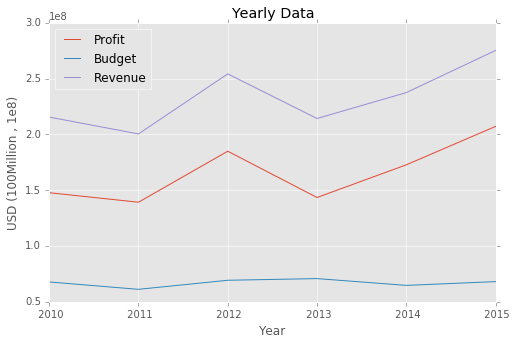

In [43]:
# Line plot, include a title
p = yrgroupmean["Profit"].plot(title="Yearly Data", label="Profit", figsize=(8,5))
#roi=yrgroupmean["ROI"].plot(title="Yearly Data", label = "ROI %", color="green", figsize=(8,5))
b= yrgroupmean["Budget_USD"].plot(title="Yearly Data", label="Budget", figsize=(8,5))
r=yrgroupmean["Revenue_USD"].plot(title="Yearly Data", label = "Revenue", figsize=(8,5))

r.set_xlabel("Year")
r.set_ylabel("USD (100Million , 1e8)")

r.legend(loc="upper left")


Budget spend is steady for the 6 years
Revenue and Profit follow a similar path a spike in 2012 followed by a rapid decline and then a steady rise in profits with 2015 the most profitable year. There is a correlation between how much revenue is gained and the profit while budget appears approximately constant.

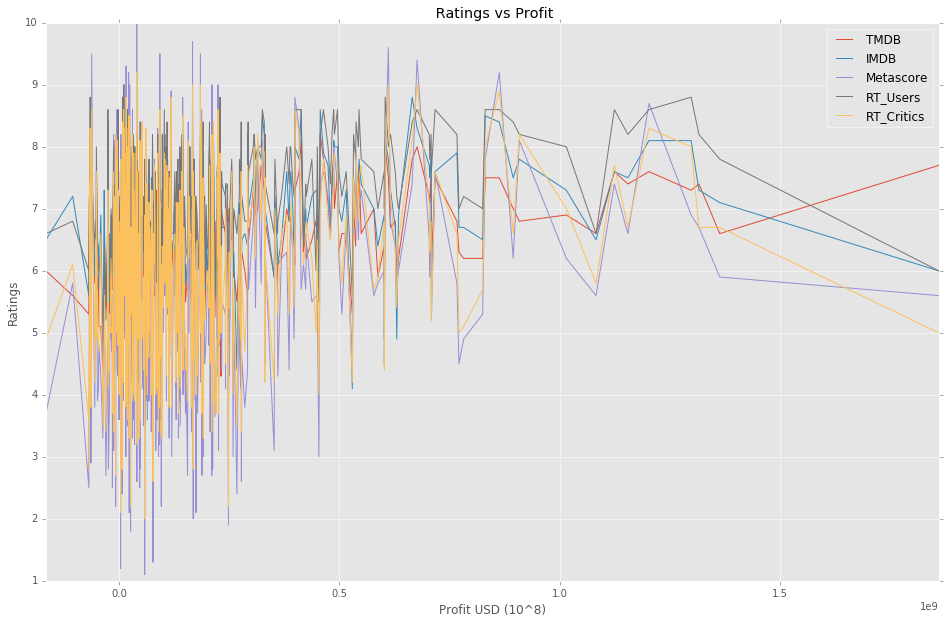

In [65]:
profit_group=final_df.groupby("Profit")
profit_group.sum()  #sum all values for that group
profit_groupmean = profit_group.mean()  

# Line plot

v=profit_groupmean["vote_average"].plot(title="Ratings vs Profit", label="TMDB", figsize = (16,10))
i = profit_groupmean["IMDB_Rating"].plot(title="Ratings vs Profit", label="IMDB", figsize=(16,10))
m= profit_groupmean["Metascore"].plot(title="Ratings vs Profit",label="Metascore", figsize=(16,10))
r=profit_groupmean["RT_Users_Rating"].plot(title="Ratings vs Profit", label="RT_Users",figsize=(16,10))
rt=profit_groupmean["RT_Rating"].plot(title=" Ratings vs Profit", label="RT_Critics",figsize=(16,10))

rt.set_xlabel("Profit USD (10^8)")
rt.set_ylabel("Ratings")
rt.legend(loc="upper right")



this shows very little correlation between how critically rated a film is and how profitable it will be. In fact the most highly rated and poorly rated shows are nearer the lower end of the Profit scale. 
The most profitable films have ratings scores slightly above average.

However it shows that the ratings from the different sites are correlated to a degree. Except for average vote from the TMDB site, this deviates the most from the other scores 

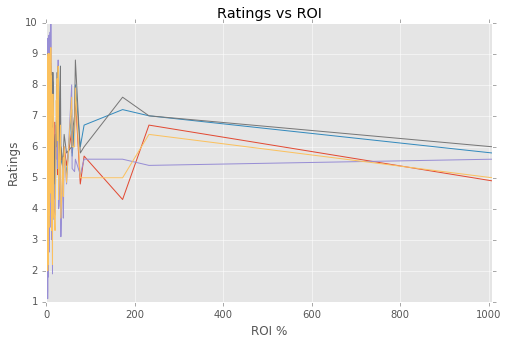

In [45]:
profit_group=final_df.groupby("ROI")
profit_group.sum()  #sum all values for that group
profit_groupmean = profit_group.mean()  

# Line plot, include a title

v=profit_groupmean["vote_average"].plot(title="Ratings vs ROI", label="TMDB", figsize = (8,5))
i = profit_groupmean["IMDB_Rating"].plot(title="Ratings vs ROI", label="IMDB", figsize=(8,5))
m= profit_groupmean["Metascore"].plot(title="Ratings vs ROI",label="Metascore", figsize=(8,5))
r=profit_groupmean["RT_Users_Rating"].plot(title="Ratings vs ROI",label="RT_Users",figsize=(8,5))
rt=profit_groupmean["RT_Rating"].plot(title="Ratings vs ROI", label="RT_Rating",figsize=(8,5))

rt.set_xlabel("ROI %")
rt.set_ylabel("Ratings")


again very little correlation between how critically acclaimed a film is and its return on investment
Huge variance in the lower end of the ROI scale as per the Profit graph above.


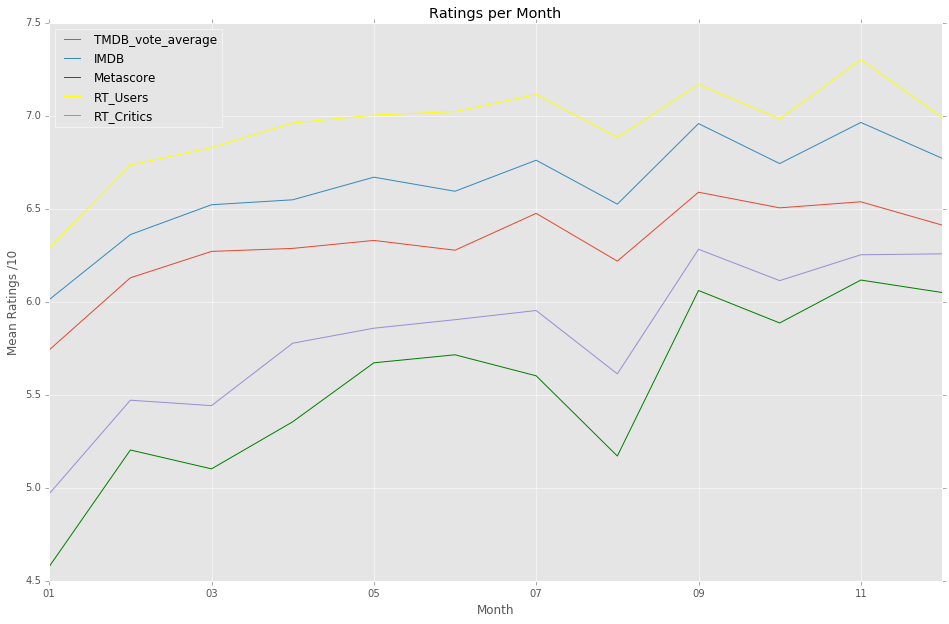

In [58]:
v = monthgroupmean["vote_average"].plot(title="Ratings vs Profit", label="TMDB_vote_average", figsize = (16,10))
i = monthgroupmean["IMDB_Rating"].plot(title="Ratings per Month", label="IMDB", figsize=(16,10))
m = monthgroupmean["Metascore"].plot(title="Ratings per Month", color="green",label="Metascore",figsize=(16,10))
r = monthgroupmean["RT_Users_Rating"].plot(title="Ratings per Month",color="yellow", label="RT_Users",figsize=(16,10))
rt= monthgroupmean["RT_Rating"].plot(title="Ratings per Month",label="RT_Critics",figsize=(16,10))

rt.set_xlabel("Month")
rt.set_ylabel("Mean Ratings /10")
rt.legend(loc="upper left")

Month ratings increase as the year progresses with January being the lowest ratings, there is a decrease in August possibly due to the gap between Summer block buster season and Oscar season where critically acclaimed films may wait to be relased from November the beginning of Oscar season. This correlates with a spike in Novembers ratings. 
Again the ratings correlate and it is apparant that the Rotten Tomatoes User ratings are the most generous and Metascore the lowest of the ratings. 

Pie Chart of Genre Data - with profit information overlaid

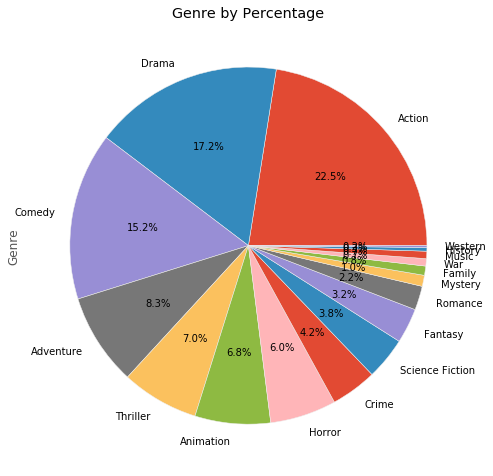

In [55]:
g=gen_freq.plot(kind="pie", autopct="%.1f%%" , figsize=(8, 8), title="Genre by Percentage")

Pie chart visualising the percentage of Genre Films for the past 6 years
Once again Action is the highest percentage 22.5%, followed by Drama 17.2% and Comedy 15.2%


Bar chart of Count of Films released per top 10 Production Country 

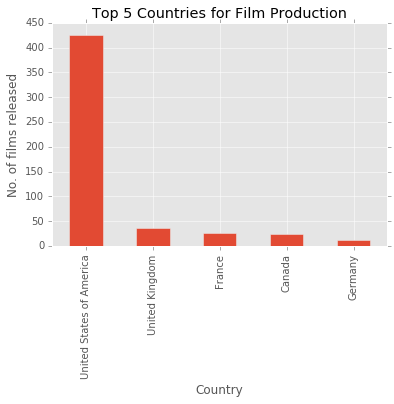

In [56]:
topcountry=country_freq[:5] #look at top 5 production countries
mth_plot=topcountry.plot(kind="bar", title = "Top 5 Countries for Film Production")
mth_plot.set_xlabel("Country")
mth_plot.set_ylabel("No. of films released")


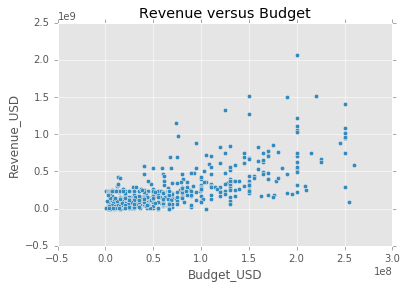

In [57]:
final_df.plot(kind="scatter", x= "Budget_USD", y= "Revenue_USD",title = "Revenue versus Budget" )


Scatter plot of Revenue versus Budget showing there is some positive correlation between revenue and budget.